In [209]:
import pandas as pd
import numpy as np 
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#read data 
df = pd.read_csv("applesOranges.csv")
X = df[["x.1","x.2"]].T

1)
a)

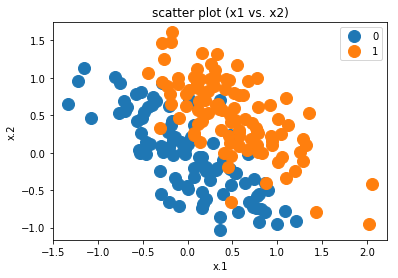

In [210]:
def datagraph() :
   plt.figure()
   groups = df.groupby('y')
   for name, group in groups:
      plt.plot(group["x.1"], group["x.2"], marker='o', linestyle='', ms=12, label=name)
   plt.xlabel("x.1")
   plt.ylabel("x.2")
   plt.legend()
   plt.title("scatter plot (x1 vs. x2)")
datagraph()

b)
for α  = 20 (w = [ 0.93969262  0.34202014]) it is giving the best performance with %76

76.0 best performance
[ 0.93969262  0.34202014] weight vector
20 α value


([<matplotlib.axis.XTick at 0x118f32400>,
 <a list of 19 Text xticklabel objects>)

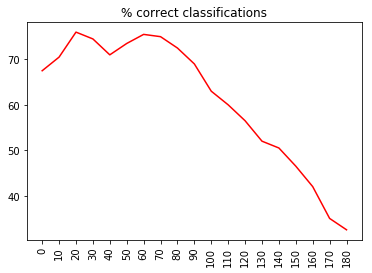

In [211]:
def acc_f(weight,X):
    h = np.dot(weight,X)
    h[h == 0] = 1
    h[h < 0] = 0   
    wrong = (np.sign(h) != df["y"]).nonzero()[0]
    return wrong
theta = np.arange(0,190,10)
thetar = theta * (np.pi / 180.0)
weights = np.array(list(zip(np.cos(thetar),np.sin(thetar))))
acc = np.zeros((len(weights)))
ind = 0
for i in weights: 
    acc[ind] = (1-(acc_f(i,X).shape[0]/float(df.shape[0])))*100
    ind = ind+1
print(str(acc[np.argmax(acc)])+" best performance")
print(str(weights[np.argmax(acc)])+" weight vector")
print(str(theta[np.argmax(acc)])+" α value")
plt.figure()
plt.plot(theta,acc,color = "r")
plt.title("% correct classifications")
plt.xticks(np.arange(min(theta),max(theta)+10,10.0),rotation=90)

c)
for bias = -0.146 it is giving the best performance with %80.5 if we use the weight [ 0.93969262  0.34202014].

In [212]:
X1 = np.concatenate((np.ones((1,X.shape[1])), X))
bias = np.arange(-3,3.001,0.001)
weight = weights[np.argmax(acc)]
accb = np.zeros((len(bias)))
ind = 0
for i in bias : 
    weight1 = np.insert(weight,0,i)
    accb[ind] = (1-(acc_f(weight1,X1).shape[0]/float(df.shape[0])))*100
    ind =ind +1
print(str(max(accb))+" best performance")
maxind = np.argmax(accb)
maxb = bias[maxind]
print(str(maxb)+" bias")

80.5 best performance
-0.146 bias


#d) There are points that misclassified with this classification.It
nearly gives correct prediction for the data points from the class 1 but for the values belong class 0 nearly half of them predicted as they belong class 1.It is not a optimum linear seperator

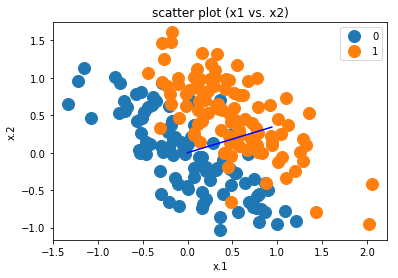

In [213]:
datagraph()
plt.plot([0.0,0.93969262 ],[0.0,0.34202014],color = "blue")    # weight

e)If we choose bias -0.3 and  α  = 45 (w =[ 0.70710678  0.70710678]) we are getting %91.5 accuracy
It is the best accuracy in the range it is taken.

-0.3 bias value
[ 0.70710678  0.70710678] weight vector
45 α value
91.5best performance


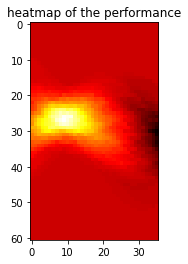

In [214]:
bias = np.arange(-3,3.1,0.1)
thetas = np.arange(0,180,5)
thetas2 = thetas*(np.pi /180. )
weights = np.array(list(zip(np.cos(thetas2),np.sin(thetas2))))
ind = 0
acct = np.zeros((len(bias)*len(weights)))
for i in bias:
    for j in weights : 
        weight_last = np.insert(j,0,i)
        acct[ind] = (1-(acc_f(weight_last,X1).shape[0]/float(df.shape[0])))*100
        ind = ind +1
        
acc = acct.reshape((len(bias),len(weights)))
i,j = np.unravel_index(acc.argmax(), acc.shape)# i bias, j weight
print(str(bias[i])+" bias value")#27   // -0.3
print(str(weights[j])+" weight vector")#9  // [ 0.70710678  0.70710678]
print(str(thetas[j])+" α value") # 45
print(str(acc[i,j])+"best performance")# 91.5
plt.figure()
plt.title("heatmap of the performance")
plt.imshow(acc, cmap='hot', interpolation='nearest')
plt.show()

f)It can be problematic for the huge datasets concerning the performance of the code.Moreover if the data is not linearly separable then this method must fail in this case.

2)
a)


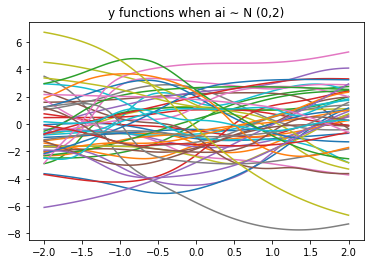

In [215]:
def make_func(a,b,w):
    def func(x):
       return np.dot(w,np.tanh(a*(x-b)))
    return func

def g(x):
    return -1*x

def mlp(c,d,ind) :
   ind = 0
   lst = list()
   mse = np.zeros((50))
   plt.figure()
   for i in range(50) : 
      w = np.random.normal(0,1, 10)
      b = np.random.uniform(-2,2,10)
      a = np.random.normal(c,np.sqrt(d),10)
      y = make_func(a,b,w)
      lst.append(make_func(a,b,w))
      ax = np.linspace(-2,2,100)
      ly = np.array([y(t) for t in ax])
      lg = np.array([g(t) for t in ax])
      mse_temp = np.dot((ly-lg),(ly-lg))/len(ly)
      mse[ind] = mse_temp
      plt.plot(ax,ly)
      ind = ind +1 
   return lst,mse
    
mlp1,mse1 = mlp(0,2,0)    
plt.title("y functions when ai ∼ N (0,2)")


b)The functions with ai ∼ N (0,0.5) are more smoother than the first ones.

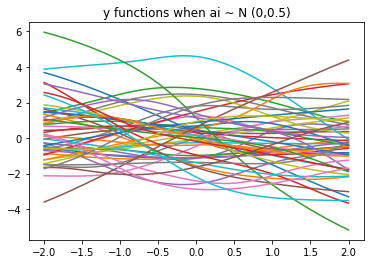

In [216]:
mlp2,mse2 = mlp(0,0.5,50)
plt.title("y functions when ai ∼ N (0,0.5)")

In [ ]:
c)

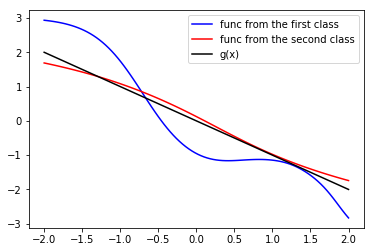

In [217]:
ax = np.linspace(-2,2,100)
ay1 = np.array([mlp1[np.argmin(mse1)](t) for t in ax])       
ay2 = np.array([mlp2[np.argmin(mse2)](t) for t in ax])

plt.figure()
plt.plot(ax,ay1,label = "func from the first class",color = "blue")
plt.plot(ax,ay2,label = "func from the second class",color = "red")
plt.plot([-2,2],[2,-2],color = "black",label = "g(x)")
plt.legend()
